# SAMD9L
[ataxia-pancytopenia syndrome (ATXPC)](https://omim.org/entry/159550) is caused by heterozygous mutation in the SAMD9L gene. 

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


# SAMD9L
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SAMD9L.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'SAMD9L'
mane_tx_id = 'NM_152703.5'
mane_protein_id = 'NP_689916.2' # sterile alpha motif domain-containing protein 9-like
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

### Phenopackets
We loaded a cohort of 22 phenopackets representing published descriptions of individuals with pathogenic variants in ASPM diagnosed with MCPH5.
TODO UPDATE

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24'
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 31/31 [00:00<00:00, 1114.83 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
19,Thrombocytopenia
16,Neutropenia
16,Unsteady gait
12,Pancytopenia
12,Myelodysplasia
10,Anemia
10,Cerebellar atrophy
9,Hyperreflexia
9,Ataxia
9,Gaze-evoked horizontal nystagmus


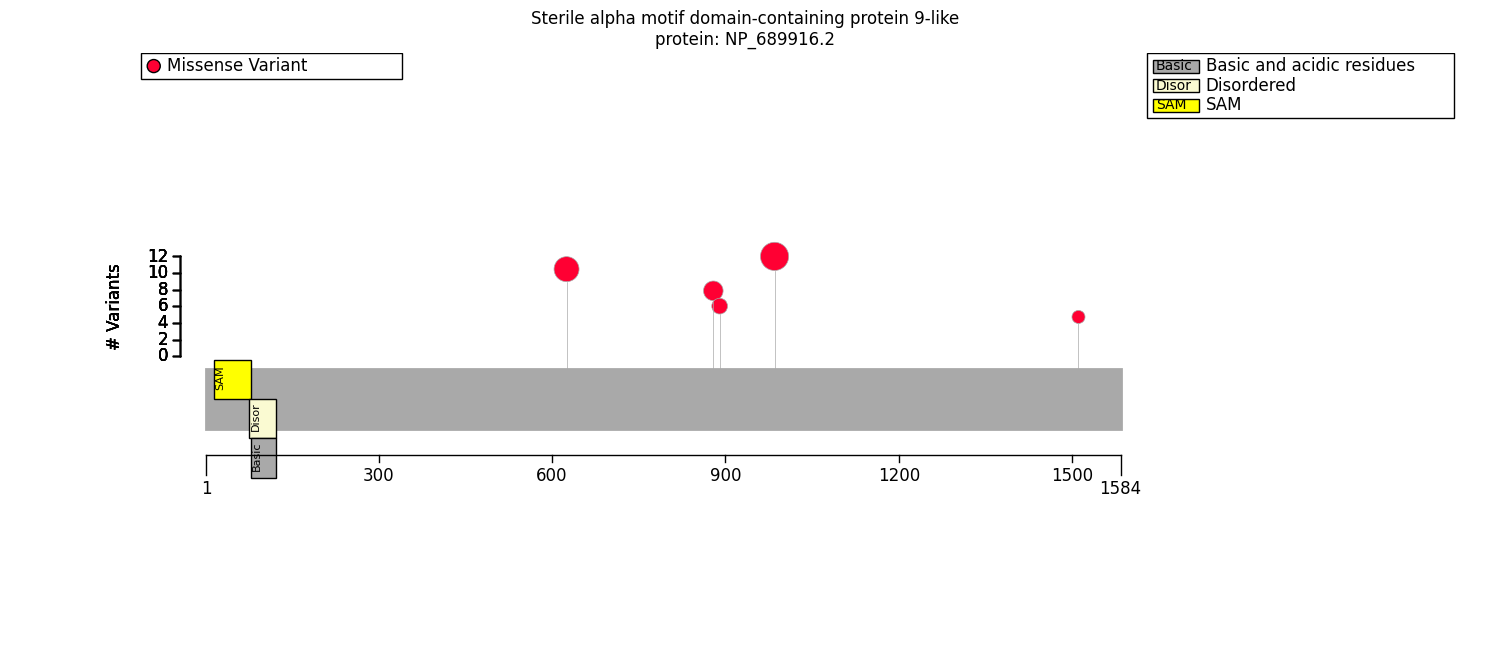

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

samd9l_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
samd9l_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model.genome import Region
from gpsea.analysis.clf import  monoallelic_classifier
from gpsea.analysis.predicate import protein_region
from gpsea.view import MtcStatsViewer


n_term = protein_region(region=Region(0, 950), tx_id=mane_tx_id)
nterm_clf = monoallelic_classifier(
    a_predicate=n_term,
    b_predicate=~n_term,
    a_label="N Term",
    b_label="other")
nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=nterm_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(nterm_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,5
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,52
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,75


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group,N Term,other,Corrected p values,p values
Neutropenia [HP:0001875],6/15 (40%),10/12 (83%),0.430927,0.047328
Thrombocytopenia [HP:0001873],8/17 (47%),11/13 (85%),0.430927,0.057457
Pancytopenia [HP:0001876],5/14 (36%),7/9 (78%),0.446897,0.089379
Ankle clonus [HP:0011448],4/14 (29%),2/2 (100%),0.468750,0.125000
Dysarthria [HP:0001260],7/15 (47%),0/2 (0%),1.000000,0.485294
Anemia [HP:0001903],5/14 (36%),5/11 (45%),1.000000,0.696830
Gait disturbance [HP:0001288],12/12 (100%),4/4 (100%),1.000000,1.000000
Unsteady gait [HP:0002317],12/14 (86%),4/4 (100%),1.000000,1.000000
Hyperreflexia [HP:0001347],13/13 (100%),2/2 (100%),1.000000,1.000000
Abnormal reflex [HP:0031826],13/13 (100%),2/2 (100%),1.000000,1.000000


The following is driven by multiple observations of Arg986Cys in a family with ataxia-pancytopenia syndrome (PMID:28202457) as
well as  multiple observations of Ser626Leu spinocerebellar ataxia-49 (PMID:35310830). Our entire cohort of 31 individuals is
relatively small to attain high statistical power.

In [9]:
from gpsea.analysis.predicate import variant_key

arg986cys = variant_key("7_93133016_93133016_G_A") # c.2956C>T p.Arg986Cys	
ser626leu = variant_key("7_93134095_93134095_G_A") # c.1877C>T p.Ser626Leu	(9 individuals)

arg986cys_clf = monoallelic_classifier(
    a_predicate=arg986cys,
    b_predicate=ser626leu,
    a_label="Arg986Cys",
    b_label="Ser626Leu")
arg986cys_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=arg986cys_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=arg986cys_result)

Allele group,Arg986Cys,Ser626Leu,Corrected p values,p values
Thrombocytopenia [HP:0001873],7/9 (78%),0/9 (0%),0.006787,0.002262
Neutropenia [HP:0001875],7/9 (78%),0/9 (0%),0.006787,0.002262
Pancytopenia [HP:0001876],4/6 (67%),0/9 (0%),0.021978,0.010989
Unsteady gait [HP:0002317],4/4 (100%),9/9 (100%),1.000000,1.000000
Gait disturbance [HP:0001288],4/4 (100%),9/9 (100%),1.000000,1.000000
Nystagmus [HP:0000639],4/4 (100%),9/9 (100%),1.000000,1.000000


# Summary

In [10]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=nterm_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=arg986cys_result,
    ),
)

caption = """A recent summary of SAMD9L variants stated there was no evidence of phenotype–genotype correlation \\cite{PMID_38594844}.
"""

report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [11]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [12]:
summarizer.process_latex(report=report, protein_fig=samd9l_fig)

Figure saved to ../../supplement/img/SAMD9L_protein_diagram-draft.pdf
Output to ../../supplement/tex/SAMD9L_summary_draft.tex
